In [33]:
import numpy as np
from matplotlib import pyplot

P=4

In [34]:
def Matrix_mnist(M,P):
    from matplotlib import pyplot
    M_inv = np.zeros((28,28,P))
    for i in range(0,P):
        M_inv[:,:,i] = M[i].reshape(28,28)
    return M_inv[3:23, 3:23, :]


In [35]:
def Input_mnist(P):
    import numpy as np
    from keras.datasets import mnist
    # loading
    (X, y), (k,h) = mnist.load_data()
    # Define patterns
    M = np.zeros((P,28*28))
    l    = 0
    flag = 0
    for i in range(0,P):
        for j in range(np.size(y)):
            if y[j] == i:
                if flag == 0:
                    m = j
                    M[l,:] = np.ravel(X[j,:,:]) 
                    flag = 1
                    l += 1
        flag = 0
    for i in range(0,P):
        M[i] /= np.max(M[i])
    mask = M<=0.5
    M[mask] = -1
    M[~mask] = 1        
    M_mat = Matrix_mnist(M,P)
    M = np.zeros((P,20*20))
    for i in range(0,P):
        M[i,:] = np.ravel(M_mat[:,:,i]) 
    return M_mat, M

M_mat, M = Input_mnist(P)

def plot_img(M,P):
    for i in range(0,P):
        pyplot.imshow(M[:,:, i], cmap=pyplot.get_cmap('gray'))
        pyplot.show()
        


In [36]:

def J(M):
    
    matrix_dim=M.shape
    J=np.zeros((matrix_dim[1],matrix_dim[1]))

    for i in range(0,matrix_dim[1]):
        for j in range(0,matrix_dim[1]):
            if j!=i:
                J[i,j]=np.sum([M[a,i]*M[a,j] for a in range(0,matrix_dim[0])])/matrix_dim[1]
    return J

In [37]:
def Wrong_patterns(q,M):
    from numpy import random

    Y=np.zeros((M.shape))

    for i in range(0,M.shape[0]):
        x=M[i,:]

        rand=np.random.random_sample()
        for j in range(0,M.shape[1]):
            rand=np.random.random_sample()
            if rand<=q:
                Y[i,j]=x[j]
            else:
                Y[i,j]=-x[j]
    return Y

In [38]:
def update_y(J,y,M,iter_max=100):
    import numpy as np
    flag = 1
    t    = 0 
    
    # Update
    y_old    = np.zeros(len(y))
    y_old[:] = y[:]
    while(flag and t <= iter_max):
        #print('old y:', y_old)
        for i in range(J.shape[1]):
            y[i] = np.sign(np.dot(J[i,:],y))
            if (y[i]==0):
                y[i] = 1
            #print(y)
        t += 1
        k = 0
        for j in range(0,len(y)):
            if(y[j] == y_old[j]):
                k += 1
        if k==len(y):
            flag = 0
        else:
            y_old[:] = y[:]
                
    # Pattern of y updated
    P_a = -1
    if (flag == 0):
        for i in range(M.shape[0]):
            k = 0
            for j in range(0,len(y)):
                if(y[j] == M[i,j]):
                    k += 1
            if k == len(y):
                P_a = i
    #print("Final y:")
    #print(y)
    return P_a,t

In [39]:

_,M=Input_mnist(P)
M = np.array(M,dtype=np.float64)
J_matrix=J(M)

print('patterns:',M, '\n', 'shape: \n', M.shape)
print('J: \n', J_matrix)

patterns: [[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]] 
 shape: 
 (4, 400)
J: 
 [[0.   0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.   0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.   ... 0.01 0.01 0.01]
 ...
 [0.01 0.01 0.01 ... 0.   0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.   0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.  ]]


In [40]:
def pippo(M,P):
    from matplotlib import pyplot
    M_inv = np.zeros((20,20,P))
    for i in range(0,P):
        M_inv[:,:,i] = M[i].reshape(20,20)
        pyplot.imshow(M_inv[:,:,i], cmap=pyplot.get_cmap('gray'))
        pyplot.show()
    return M_inv

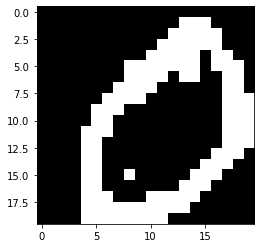

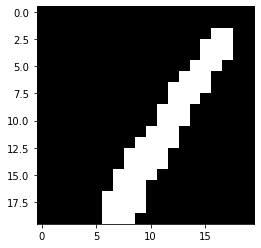

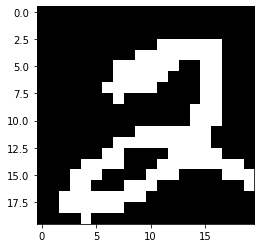

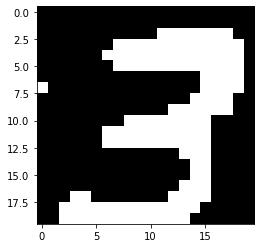

array([[[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        ...,
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]],

       [[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        ...,
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]],

       [[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        ...,
        [-1.,  1., -1.,  1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]],

       ...,

       [[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1.,  1., -1.],
        ...,
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]],

       [[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1.,  1.,  1.],
        ...,
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]],

       [[-1.

In [43]:
Y=Wrong_patterns(0.999,M)

pippo(Y,P)

pattern detected:  0 in  2 iterations 

no pattern detected in: 2 iterations 

no pattern detected in: 2 iterations 

no pattern detected in: 2 iterations 



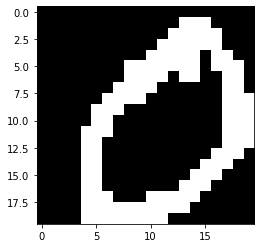

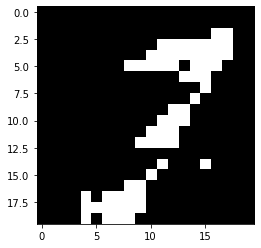

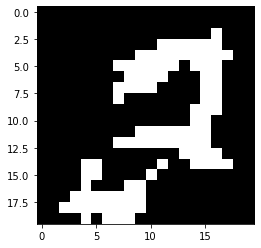

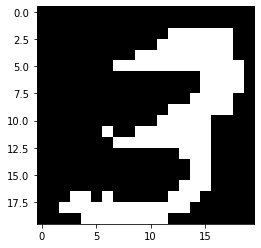

array([[[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        ...,
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]],

       [[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        ...,
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]],

       [[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        ...,
        [-1.,  1., -1.,  1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]],

       ...,

       [[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        ...,
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]],

       [[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1.,  1.,  1.],
        ...,
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]],

       [[-1.

In [44]:
for j in range(0,P):
        pattern_giusto, iterazione= update_y(J_matrix,Y[j],M) 
        if pattern_giusto==-1:
            print('no pattern detected in:', iterazione, 'iterations \n')
        else:
            print('pattern detected: ', pattern_giusto, 'in ', iterazione, 'iterations \n')
            
pippo(Y,P)